# Machine Learning - Housing median price in California regression

In [1]:
import os
import tarfile
import urllib

%matplotlib inline
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

## Data preparation

### Data download

In [5]:
def download_data(url=HOUSING_URL, path=HOUSING_PATH, force=False):
    if not os.path.isdir(path):
        os.makedirs(path)

    if force or not os.listdir(path):
        tgz_path = os.path.join(path, "housing.tgz")
        urllib.request.urlretrieve(url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=path)
        housing_tgz.close()
    else:
        print("Folder is already non-empty!")
import pandas as pd

def load_housing_data(path=HOUSING_PATH):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
download_data(force=True)

housing = load_housing_data()

### Data inspection

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The last column of the data represents categorical parameter.

In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Basic properties of numerical parameters:

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


```"housing_median_age"```, ```"median_house_value"``` and ```"median_income"``` appear to be capped.

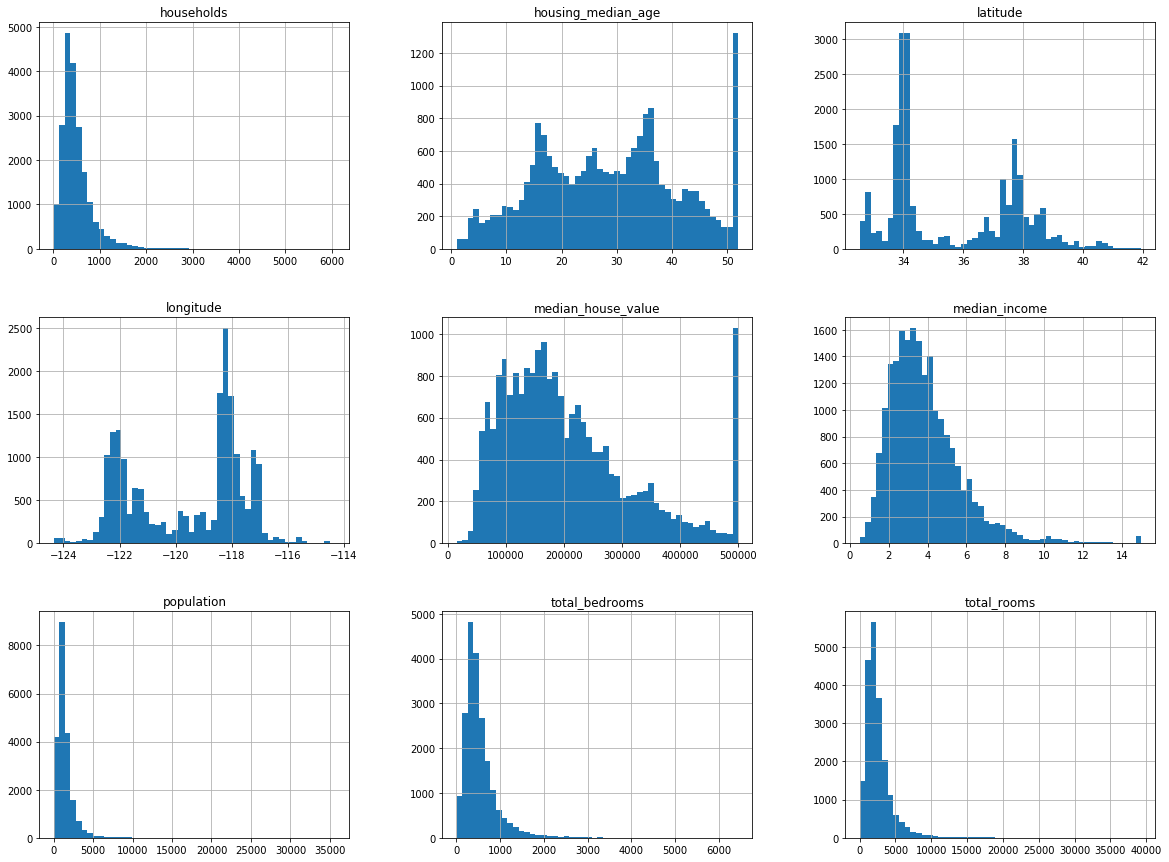

In [14]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np
def create_test_set(data, ratio=0.2):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set=create_test_set(housing)
print(len(train_set))
print(len(test_set))

In [ ]:
import hashlib

def test_set_check(ident, test_ratio, hash):
    return hash(np.int64(ident)).digest()[-1]<256*test_ratio
def create_test_set_by_id(data, id_column, test_ratio=0.2,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]
housing_with_id=housing.reset_index()
train_set, test_set=create_test_set_by_id(housing_with_id,"index")
print(len(train_set))
print(len(test_set))

In [ ]:
housing_with_id.head()

In [ ]:
housing_with_id["id"]=housing["longitude"]*1000+housing["latitude"]
train_set, test_set=create_test_set_by_id(housing_with_id,"id")
print(len(train_set))
print(len(test_set))

### Data manipulation

Splitting the data to the train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

In [ ]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)
housing["income_cat"].hist(bins=5, figsize=(20,15))
plt.show()

The data is splitted into the test and train sets by the use of ```sklearn.model_selection.StratifiedShuffleSplit```.
The shuffle is done according to the ```housing["median_income"]``` label.

In [19]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, np.ceil(housing["median_income"]/1.5)):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [23]:
print(len(strat_test_set)/(len(strat_train_set)+len(strat_test_set)))


0.2


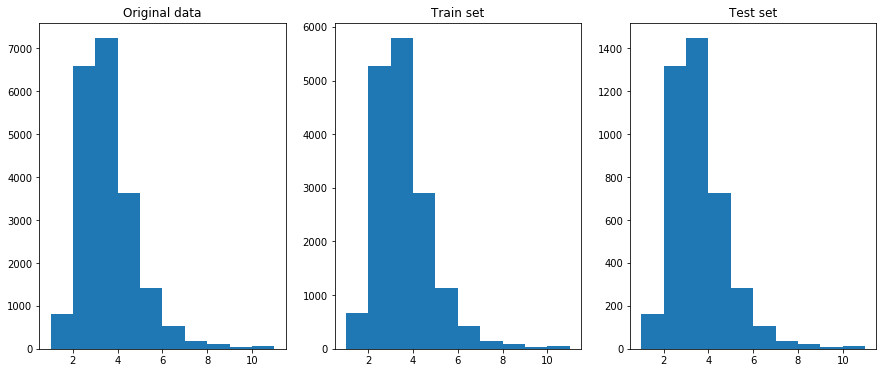

In [40]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.hist(np.ceil(housing["median_income"]/1.5))
plt.title("Original data")
plt.subplot(1,3,2)
plt.hist(np.ceil(strat_train_set["median_income"]/1.5))
plt.title("Train set")
plt.subplot(1,3,3)
plt.hist(np.ceil(strat_test_set["median_income"]/1.5))
plt.title("Test set")
plt.show()

Save test and train data if not saved yet

In [46]:
import pickle
import os.path
def save_sets(obj, fname, force=False):
    if not os.path.isfile(fname) or force:
        pickle.dump(obj, open( fname, "wb" ))

save_sets(strat_test_set, "test_set.pkl")
save_sets(strat_train_set, "train_set.pkl")

## Train data close inspection

In [48]:
housing=strat_train_set.copy()

In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16356 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 2.0+ MB


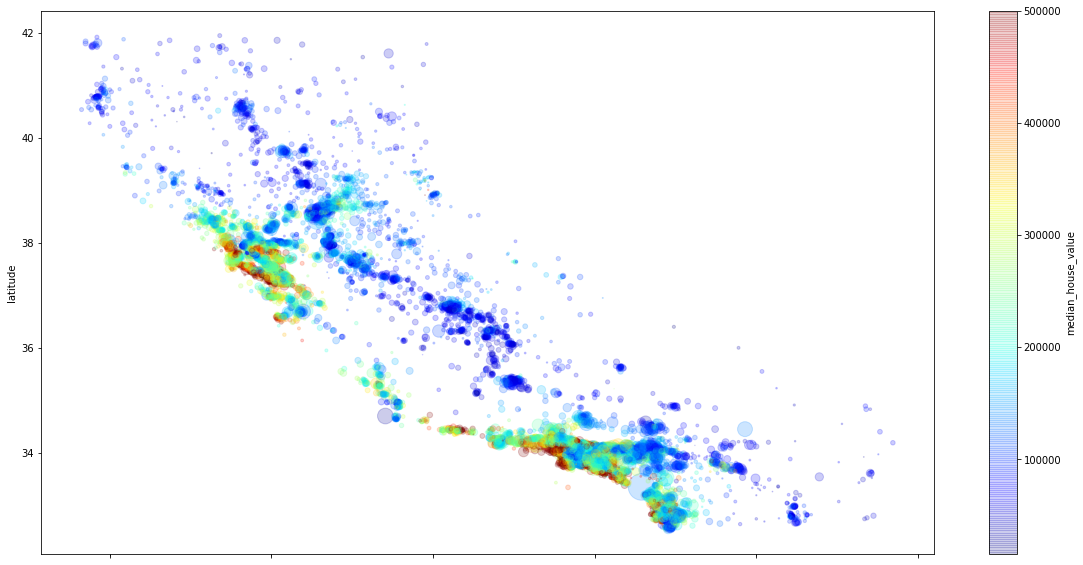

In [51]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, s=housing["population"]/50, figsize=(20,10), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

In [52]:
corr_matrix=housing.corr()

In [53]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687474
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049177
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

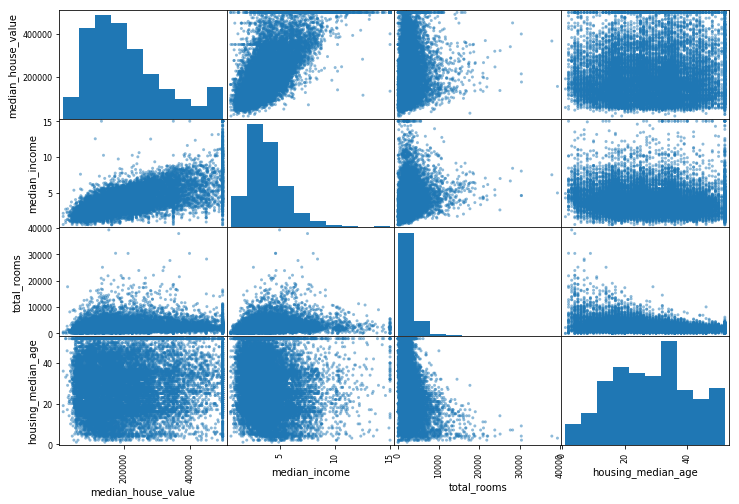

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=(12,8))
plt.show()

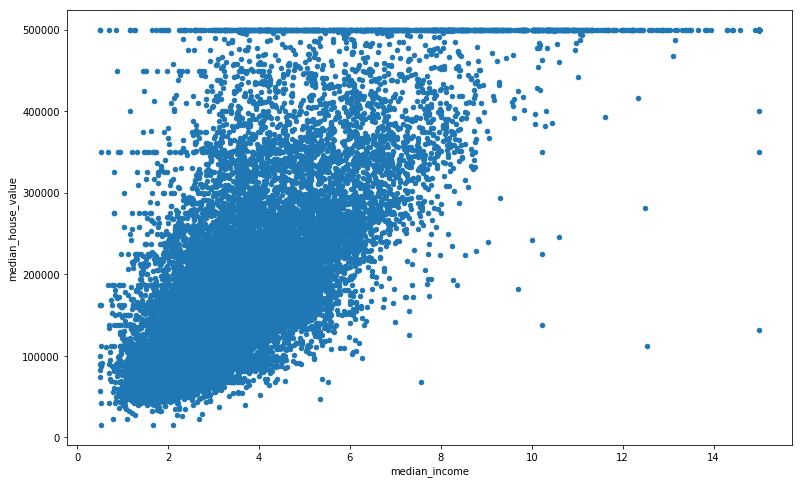

In [64]:
plt.figure(figsize=(13,8))
a=plt.axes()
housing.plot(kind="scatter", y="median_house_value", x="median_income", ax=a)
plt.show()

In [ ]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
housing.head()

In [ ]:
corr_matrix=housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
housing.plot(kind="scatter", y="median_house_value", x="bedrooms_per_room")

In [ ]:
housing=strat_train_set.copy()

In [ ]:
housing.drop("median_house_value", axis=1, inplace=True)

In [ ]:
housing.head()

In [ ]:
housing_labels=strat_train_set["median_house_value"].copy()

In [ ]:
print(type(housing_labels))
#housing.info()

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
imputer=Imputer(strategy="median")

In [ ]:
housing_num=housing.drop("ocean_proximity", axis=1)

In [ ]:
imputer.fit(housing_num)

In [ ]:
imputer.statistics_

In [ ]:
X=imputer.transform(housing_num)

In [ ]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns)

In [ ]:
housing_tr.describe()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

In [ ]:
print(encoder.classes_)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer(sparse_output=True)
houstin_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household=X[:,population_ix]/X[:,household_ix]
        population_per_household=X[:,bedrooms_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs=attr_adder.transform(housing.values)

In [ ]:
pd.DataFrame(housing_extra_attribs).head()

In [ ]:
housing_cat_1hot.shape

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([('imputer', Imputer(strategy="median")),('attr_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler())])

housing_num_tr=num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num.info()
housing_num_tr

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class MyLabelBinarizer(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.encoder = LabelBinarizer()
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [ ]:
from sklearn.pipeline import FeatureUnion
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs)),('imputer', Imputer(strategy="median")),('attr_adder', CombinedAttributesAdder()), ('std', StandardScaler())])
cat_pipeline=Pipeline([('selector', DataFrameSelector(cat_attribs)),('label_binarizer', MyLabelBinarizer())])
full_pipeline=FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline)])

In [ ]:
num_attribs

In [ ]:
housing_prepared=full_pipeline.fit_transform(housing)

In [ ]:
pd.DataFrame(housing_prepared[:5,:]).head()

In [ ]:
housing.head()

In [ ]:
housing_prepared.shape

In [ ]:
pd.DataFrame(housing_prepared).head()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

In [ ]:
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
some_data=housing.iloc[:5]

In [ ]:
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

In [ ]:
print("Predictions: {0}".format(lin_reg.predict(some_data_prepared)))
print("Labels: {0}".format(list(some_labels)))

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [ ]:
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)

In [ ]:
tree_rmse

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [ ]:
np.sqrt(-scores)

In [ ]:
scores2=cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [ ]:
np.mean(np.sqrt(-scores2)), np.std(np.sqrt(-scores2))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_mse=mean_squared_error(housing_labels,forest_reg.predict(housing_prepared))
forest_scores=cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [ ]:
np.mean(np.sqrt(-forest_scores)), np.std(np.sqrt(-forest_scores))

In [ ]:
np.sqrt(forest_mse)

In [ ]:
from sklearn.externals import joblib

joblib.dump(forest_reg, "forest_reg.pkl")

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators': [40,60,90], 'max_features': [2,4,6,8]}
]
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

In [ ]:
joblib.dump(grid_search.best_estimator_, "best_forest_reg.pkl")

In [ ]:
cross_val_score(grid_search.best_estimator_, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [ ]:
best_forest_scores=np.array([ -2.33277331e+09,  -2.17503353e+09,  -2.38533817e+09,
        -2.53853313e+09,  -2.33182959e+09,  -2.69598293e+09,
        -2.28818586e+09,  -2.16920384e+09,  -2.68332218e+09,
        -2.40637236e+09])
np.mean(np.sqrt(-best_forest_scores))

In [ ]:
grid_search.cv_results_

In [ ]:
full_pipeline.get_params()['num_pipeline__attr_adder__add_bedrooms_per_room']

In [ ]:
full_with_forest=Pipeline([('preparations', full_pipeline), ('predictor', RandomForestRegressor())])

In [ ]:
full_with_forest.get_params()

In [ ]:

grid_search=GridSearchCV(full_with_forest, {'preparations__num_pipeline__attr_adder__add_bedrooms_per_room': [True, False]}, cv=5, scoring="neg_mean_squared_error")


In [ ]:
grid_search.fit(housing, housing_labels)

In [ ]:
grid_search.cv_results_